In [1]:
import pandas as pd
data= pd.read_csv("C:/Users/shoyinkao/insurance.csv")
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [2]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [3]:
data.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [4]:
data.shape

(1338, 7)

In [5]:
#!pip install pycaret

In [6]:
from pycaret.regression import *
r2 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True,
           feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1338, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


# Model Training and Validation 
lr = create_model('lr')

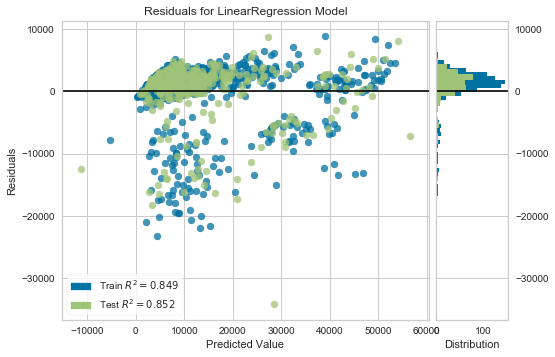

In [8]:
# plot residuals of trained model
plot_model(lr, plot = 'residuals')

In [9]:
# save transformation pipeline and model 
save_model(lr, model_name = 'c:/users/shoyinkao/ins/insurance_models')

Transformation Pipeline and Model Succesfully Saved


In [12]:
model = load_model('c:/users/shoyinkao/ins/insurance_models')

Transformation Pipeline and Model Sucessfully Loaded


In [13]:
model

[Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 numeric_strategy='mean',
                                 target_variable=None)),
                 ('new_levels1',
                  New_Catagorical_Levels...
                 ('dummy', Dummify(target='charges')),
                 ('fix_perfect', Remove_100(target='charges')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', Empty()), ('fix_multi', Empty()),
                 ('dfs',
                  DFS_Classic(interactions

In [17]:
import requests
url = 'https://pycaret-insurance.herokuapp.com/predict_api'
pred = requests.post(url,json={'age':19, 'sex':'male', 'bmi':45, 'children':1, 'smoker':'no', 'region':'northwest'})
print(pred.json())

3464.0
